# Deustch-Jozsa Algorithm

In this notebook, we introduce the Deutsch-Jozsa problem, and classical and quantum algorithms to solve it. We then implement the quantum algorithm using Qiskit 1.0, and run it on a quantum simulator.

<div class="alert alert-block alert-warning">

This notebook was created for internal training purposes within the **QuantumAI.Cloud (QAC) Hub**, using materials referenced in the Reference section.

</div>

## 1. Introduction
The Deutsch–Jozsa's algorithm (or DJ for short) is a deterministic quantum algorithm proposed by David Deutsch and Richard Jozsa in 1992, with improvements by Richard Cleve, Artur Ekert, Chiara Macchiavello, and Michele Mosca in 1998. It was one of the first examples of an exponential benefit of quantum over classical computation for the “balanced vs. constant” black-box promise problem.

### 1.1 Problem Statement
__Given:__ A hidden Boolean function $f$ (oracle), which takes as input a string of bits, and returns either $0$ or $1$, that is:

$f:\left\{ 0,1 \right\}^{n}\to \left\{ 0,1 \right\}$

__Promise:__ The function is either **constant** (0 on all inputs or 1 on all inputs) or **balanced** (1 for exactly half of the input domain and 0 for the other half). 

__Problem:__ To determine (with certainty) whether f is constant or balanced.

### 1.2 Classical Solution
**TLDR;** _If we use the classical approach, we need to make at least $\frac{2^n}{2} + 1$ queries in the worst case to make sure that the function is etiher balanced or constant. For example, for a $3$-bit string, if we checked $4$ out of the $8$ possible combinations, getting all $0$'s, it is still possible that the $5^{th}$ input returns a $1$ and $f(x)$ is balanced._

Classically, in the best case, two queries to the oracle can determine if the hidden Boolean function, $f(x)$, is balanced: 
e.g. if we get both $f(0,0,0,...)\rightarrow 0$ and $f(1,0,0,...) \rightarrow 1$, then we know the function is balanced as we have obtained the two different outputs.  

In the worst case, if we continue to see the same output for each input we try, we will have to check exactly half of all possible inputs plus one in order to be certain that $f(x)$ is constant. Since the total number of possible inputs is $2^n$, this implies that we need $2^{n-1}+1$ trial inputs to be certain that $f(x)$ is constant in the worst case. For example, for a $4$-bit string, if we checked $8$ out of the $16$ possible combinations, getting all $0$'s, it is still possible that the $9^\textrm{th}$ input returns a $1$ and $f(x)$ is balanced. Probabilistically, this is a very unlikely event. In fact, if we get the same result continually in succession, we can express the probability that the function is constant as a function of $k$ inputs as:



$$ P_\textrm{constant}(k) = 1 - \frac{1}{2^{k-1}} \qquad \textrm{for } 1 < k \leq 2^{n-1}$$



Realistically, we could opt to truncate our classical algorithm early, say if we were over x% confident. But if we want to be 100% confident, we would need to check $2^{n-1}+1$ inputs.

### 1.3 Quantum Solution
Using a quantum computer, we can solve this problem with 100% confidence after only one call to the function $f(x)$, provided we have the function $f$ implemented as a quantum oracle, which maps the state $\vert x\rangle \vert y\rangle $ to $ \vert x\rangle \vert y \oplus f(x)\rangle$, where $\oplus$ is addition modulo $2$. Below is the generic circuit for the Deutsch-Jozsa algorithm.

 <img src="images/deutschjozsa.png" width="60%" align="center">

1. Set the $\left( n+1 \right)^{th}$ qubit to $\ket{-}$ by applying $X$ and $H$ gates.
2. Apply $H$ on the first $n$ qubits.
3. Apply the oracle function, $U_f$ across all qubits.
4. Apply $H$ on the first $n$ qubits.
5. Measure the first $n$ qubits.
   
If we get $0^n$ as the outcome then our function is constant, otherwise it is balanced. Thus, the algorithm makes just a single query and gives a deterministic answer for the “balanced vs. constant” black-box promise problem!

### 1.4 Analysis
Now, let's go through the steps of the algorithm:

 <img src="images/deutschjozsa2.png" width="60%" align="center">

1. Prepare two quantum registers. The first is an $n$-qubit register initialized to $|0\rangle$, and the second is a one-qubit register initialized to $|1\rangle$:

    Our initial state is $$ \ket{\psi_0} = \ket{0}^{\otimes n} \ket{0}.$$

    Next we apply an $X$ gate to last qubit,
        $$ \ket{\psi_1} = \ket{0}^{\otimes n} \ket{1}.$$

2. We apply $H$ gate to set last qubit to state $\ket{-}$ and also apply $H$ gate to first $n$ qubits,
    $$ \ket{\psi_2} = \frac{1}{\sqrt{2^n}}\sum_{x \in \{0,1\}^n} \ket{x} \otimes \ket{-}.$$

3. Now we apply the quantum oracle $U_f$. Recalling phase kickback, we can rewrite our entire state as

    $$ \ket{\psi_3} = \bigg[ \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} (-1)^{f(x)} \ket{x} \bigg] \otimes \ket{-}. $$

    Note that we apply $U_f$ to each basis state and write our quantum state using sum notation since we have an equal superposition of them.
    
    Now we can ignore the output qubit and only focus on the input qubits to write

    $$ \ket{\psi_{3,0}} = \frac{1}{\sqrt{2^n}} \sum_{x \in \{0,1\}^n} (-1)^{f(x)} \ket{x}.$$


4. Now, we apply Hadamard to each qubit, and noting that 
    $$H^{\otimes n} \ket{x} = \frac{1}{\sqrt{2^n}} \sum_{z  \in \{0,1\}^n}(-1)^{x \cdot z}\ket{z},$$
    we get
    $$ \ket{\psi_{4,0}} = \frac{1}{2^n} \sum_{x \in \{0,1\}^n} \sum_{z \in \{0,1\}^n}(-1)^{x\cdot z + f(x)} \ket{z}.$$

We know the probability of observing a state is equal to the square of its amplitude. Now let's focus on the state $z=\ket{0}^{\otimes n}$. Replacing $z=0$ in the above sum, its amplitude is given by

$$\frac{1}{2^n} \sum_{x \in \{0,1\}^n} (-1)^{f(x)}.$$

So, if the function is constant, then this sum adds up to 1 or -1, meaning that we observe $z=\ket{0}^{\otimes n}$ 100% of the time and the amplitudes of all other states cancel each other, resulting in 0 probability.  

Similarly, the probability of observing $z=\ket{0}^{\otimes n}$ is 0 if the function is balanced since exactly half of the terms have opposite signs and in this case we observe a non-zero string.

### 1.5 Why Does This Work? <a id='why-does-this-work'> </a>

- **Constant Oracle**

    When the oracle is *constant*, it has no effect (up to a global phase) on the input qubits, and the quantum states before and after querying the oracle are the same. Since the H-gate is its own inverse, in Step 4 we reverse Step 2 to obtain the initial quantum state of $|00\dots 0\rangle$ in the first register.

    $$
    H^{\otimes n}\begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
    = 
    \tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
    \quad \xrightarrow{\text{after } U_f} \quad
    H^{\otimes n}\tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix}
    = 
    \begin{bmatrix} 1 \\ 0 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
    $$

- **Balanced Oracle**

    After step 2, our input register is an equal superposition of all the states in the computational basis. When the oracle is *balanced*, phase kickback adds a negative phase to exactly half these states:

    $$
    U_f \tfrac{1}{\sqrt{2^n}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} 
    = 
    \tfrac{1}{\sqrt{2^n}}\begin{bmatrix} -1 \\ 1 \\ -1 \\ \vdots \\ 1 \end{bmatrix}
    $$


    The quantum state after querying the oracle is orthogonal to the quantum state before querying the oracle. Thus, in Step 4, when applying the H-gates, we must end up with a quantum state that is orthogonal to $|00\dots 0\rangle$. This means we should never measure the all-zero state. 


### 1.6 Worked Example  <a id='example'></a>

Let's go through a specific example for a two bit balanced function: 

Consider a two-bit function $f(x_0,x_1)=x_0 \oplus x_1$ such that 

   $f(0,0)=0$

   $f(0,1)=1$

   $f(1,0)=1$

   $f(1,1)=0$

The corresponding phase oracle of this two-bit oralce is $U_f \lvert x_1, x_0 \rangle = (-1)^{f(x_1, x_0)}\lvert x \rangle$

We will now check if this oracle works as expected by taking a example state
$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$

1. The first register of two qubits is initialized to $|00\rangle$ and the second register qubit to $|1\rangle$ 
        
   (Note that we are using subscripts 0, 1, and 2 to index the qubits. A subscript of "01" indicates the state of the register containing qubits 0 and 1)

   $$\lvert \psi_0 \rangle = \lvert 0 0 \rangle_{01} \otimes \lvert 1 \rangle_{2} $$

2. Apply Hadamard on all qubits
   
   $$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}  $$

3. The oracle function can be implemented as $\text{Q}_f = CX_{02}CX_{12}$, 
   $$
   \begin{aligned}
   \lvert \psi_2 \rangle =  \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \oplus 0 \oplus 0 \rangle - \lvert 1 \oplus 0 \oplus 0 \rangle \right)_{2} \\
       + \lvert 0 1 \rangle_{01} \otimes \left( \lvert 0 \oplus 0 \oplus 1 \rangle - \lvert 1 \oplus 0 \oplus 1 \rangle \right)_{2} \\
       + \lvert 1 0 \rangle_{01} \otimes \left( \lvert 0 \oplus 1 \oplus 0 \rangle - \lvert 1 \oplus 1 \oplus 0 \rangle \right)_{2} \\
       + \lvert 1 1 \rangle_{01} \otimes \left( \lvert 0 \oplus 1 \oplus 1 \rangle - \lvert 1 \oplus 1 \oplus 1 \rangle \right)_{2} \right]
   \end{aligned}
   $$

4. Simplifying this, we get the following: 
   $$
   \begin{aligned}
   \lvert \psi_2 \rangle & = \frac{1}{2\sqrt{2}} \left[ \lvert 0 0 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} - \lvert 0 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert  1 \rangle \right)_{2} - \lvert 1 0 \rangle_{01} \otimes \left( \lvert 0  \rangle - \lvert 1 \rangle \right)_{2} + \lvert 1 1 \rangle_{01} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}  \right] \\
       & = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)_{01} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} \\
       & = \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{0} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{1} \otimes \frac{1}{\sqrt{2}} \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2}
   \end{aligned}
   $$

5. Apply Hadamard on the first register
   
   $$ \lvert \psi_3\rangle = \lvert 1 \rangle_{0} \otimes \lvert 1 \rangle_{1} \otimes \left( \lvert 0 \rangle - \lvert 1 \rangle \right)_{2} $$

6. Measuring the first two qubits will give the non-zero $11$, indicating a balanced function.

## 2. Qiskit Implementation

Now, we are ready to move onto the implementation of the DJ Algorithm using Qiskit 1.0 

### 2.1 Environment Setup
We have already provided the installs for you in the next few cells. Simply find the cells that match your environment and run *only that cell.*

In [10]:
### Install Qiskit: Cloud-based Environment(Google Colab/qBraid) ###
!pip install qiskit[visualization]==1.0.2

  Using cached qiskit-1.0.2-cp38-abi3-win_amd64.whl.metadata (12 kB)
Using cached qiskit-1.0.2-cp38-abi3-win_amd64.whl (4.1 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.1.1
    Uninstalling qiskit-1.1.1:
      Successfully uninstalled qiskit-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-ibm-runtime 0.24.1 requires qiskit>=1.1.0, but you have qiskit 1.0.2 which is incompatible.


In [11]:
### Install Qiskit: Locally on a PC ###
%pip install qiskit[visualization]==1.0.2

Note: you may need to restart the kernel to use updated packages.


In [12]:
### Install Qiskit: Locally on a Mac or Linux ###
%pip install 'qiskit[visualization]'==1.0.2

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'qiskit[visualization]'==1.0.2": Expected package name at the start of dependency specifier
    'qiskit[visualization]'==1.0.2
    ^



Now, let's test to make sure everything is working properly. We've provided some very basic Qiskit code for you in the following cell. This code will create a quantum circuit, apply a single gate, and then draw that circuit. Run the cell below to make sure your system is set up properly.

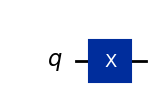

In [13]:
from qiskit import QuantumCircuit

# Create a new circuit with a single qubit
qc = QuantumCircuit(1)

# Add a Not gate to qubit 0
qc.x(0)

# Return a drawing of the circuit using matplotlib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

Did everything work as expected? If so, you're just about finished with this step. The last part is to install the other required packages you will need.

In [14]:
# Install required packages
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib
%pip install pylatexenc
%pip install qiskit-transpiler-service

Note: you may need to restart the kernel to use updated packages.
  Using cached qiskit-1.1.1-cp38-abi3-win_amd64.whl.metadata (13 kB)
Using cached qiskit-1.1.1-cp38-abi3-win_amd64.whl (4.1 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.0.2
    Uninstalling qiskit-1.0.2:
      Successfully uninstalled qiskit-1.0.2
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [15]:
### CHECK QISKIT VERSION
import qiskit
qiskit.__version__

'1.0.2'

In [16]:
### CHECK OTHER DEPENDENCIES
%pip show pylatexenc matplotlib 

Name: pylatexenc
Version: 2.10
Summary: Simple LaTeX parser providing latex-to-unicode and unicode-to-latex conversion
Home-page: https://github.com/phfaist/pylatexenc
Author: Philippe Faist
Author-email: philippe.faist@bluewin.ch
License: MIT
Location: c:\users\hp\music\qintern\week1lab\quantum-algorithms\.venv\lib\site-packages
Requires: 
Required-by: 
---
Name: matplotlib
Version: 3.9.0
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: Unknown <matplotlib-users@python.org>
License: License agreement for matplotlib versions 1.3.0 and later
        
        1. This LICENSE AGREEMENT is between the Matplotlib Development Team
        ("MDT"), and the Individual or Organization ("Licensee") accessing and
        otherwise using matplotlib software in source or binary form and its
        associated documentation.
        
        2. Subject to the terms and conditions of this License Agreement, MDT
        hereby 

Other common issues could be solved by the following:

*   If you aren't seeing any output, make sure you've run each code cell.
*   Try restarting your kernel. How you do this varies by the environment you're using.

If you're still running into problems, check out this [Coding with Qiskit](https://www.youtube.com/watch?v=dZWz4Gs_BuI) video for additional tips, or explore [the documentation](https://docs.quantum.ibm.com/start/install) for help.

### 2.2. Creating Oracles

Lets start with the imports:

In [17]:
# imports
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import numpy as np
import random

### 2.3 Creating Quantum Oracles

Let's explore different ways to create a quantum oracle.

#### Constant Function

For a constant function, the approach is straightforward:

1. If \(f(x) = 0\), apply the $I$ gate to the qubit in register 2.
2. If \(f(x) = 1\), apply the $X$ gate to the qubit in register 2.

#### Balanced Function

To create a balanced function, we can guarantee balance by performing a CNOT for each qubit in register 1, with the qubit in register 2 as the target. For example:

**Balanced Circuit**
<img src="images/deutsch_balanced1.svg" alt="Balanced Circuit">


In the circuit above, the top three qubits form the input register, and the bottom qubit is the output register. The corresponding input states and their respective outputs are shown in the table below:

| Input states that output 0 | Input states that output 1 |
|:--------------------------:|:--------------------------:|
|             000            |             001            |
|             011            |             100            |
|             101            |             010            |
|             110            |             111            |

We can modify the results while maintaining balance by wrapping selected controls in X-gates. For example, consider the following circuit and its results table:

**Modified Balanced Circuit**

<img src="images/deutsch_balanced2.svg" alt="Modified Balanced Circuit">


| Input states that output 0 | Input states that output 1 |
|:--------------------------:|:--------------------------:|
|             001            |             000            |
|             010            |             011            |
|             100            |             101            |
|             111            |             110            |


<div class="alert alert-block alert-success">

**Task 1: Create a constant oracle**

Complete the function constant_oracle(), which takes n as the size of the input register.

**Hint**: First decide what the fixed output of the oracle will be either always 0 or always 1)
</div>

In [18]:
def append_constant_oracle(qc, n): 
    qc.barrier()   
    ### Write your code below here ###
    output_oracle = np.random.randint(0,1)
    if output_oracle == 1:
        qc.x(n)
    ### Don't change any code past this line ###
    qc.barrier()

<div class="alert alert-block alert-success">

**Task 2: Create a balanced oracle**

Complete the function balanced_oracle(), which takes n as the size of the input register. Also, generate a random binary string, b_str. For each qubit in the circuit, place an X-gate if the corresponding digit in b_str is 1, or do nothing if the digit is 0.
</div>

In [19]:
def append_balanced_oracle(qc,n):
    qc.barrier() 
    ### Write your code below here ###
    # First, we choose a binary string of length 'n' that will be the input to the oracle:
    # Next, format 'b' as a binary string of length 'n', padded with zeros:
    b_str = ''.join(str(np.random.randint(0, 2)) for _ in range(n))
    # Next, we place the first X-gates. Each digit in our binary string
    # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
    # we apply an X-gate to that qubit:
    for digit in range(n):
        if b_str[digit] == '1':
            qc.x(digit)
    
    # Do the controlled-NOT gates for each qubit, using the output qubit 
    # as the target:
    for q in range(n):
        qc.cx(q,n)
    
    # Next, place the final X-gates
    for k in range(n):
        if b_str[k] == '1':
            qc.x(k)
    ### Don't change any code past this line ###
    qc.barrier()

### 2.4 . Implement the algorithm 

<div class="alert alert-block alert-success">

**Task 3**: Now that the oracle functions are ready, we are all set to implement the algorithm! Complete the function `dj_algorithm()`, which takes the oracle we have just created(balanced/constant), and the size of input register, n as parameters. 

**Hint**: You may follow the steps given under the heading 1.3 Quantum Solution to finish this task.
</div>

In [27]:
def dj_algorithm(oracle, n):
    ### Write your code below here ###
    
    dj_circuit = QuantumCircuit(n+1,n)
    dj_circuit.x(n)
    for l in range (n+1): dj_circuit.h(l)
    
    # Let's append the oracle gate to our circuit:
    if oracle == 'balanced':
        append_balanced_oracle(dj_circuit,n)
    elif oracle == 'constant':
        append_constant_oracle(dj_circuit,n)
    else:
        print("Oracle not found")
    
    # Finally, perform the H-gates again and measure:
    for i in range(n):
        dj_circuit.h(i)
    
    for j in range(n):
        dj_circuit.measure(j, i)
        
    ### Don't change any code past this line ###
    return dj_circuit

Lets see what our circuits looks like, for n=4:

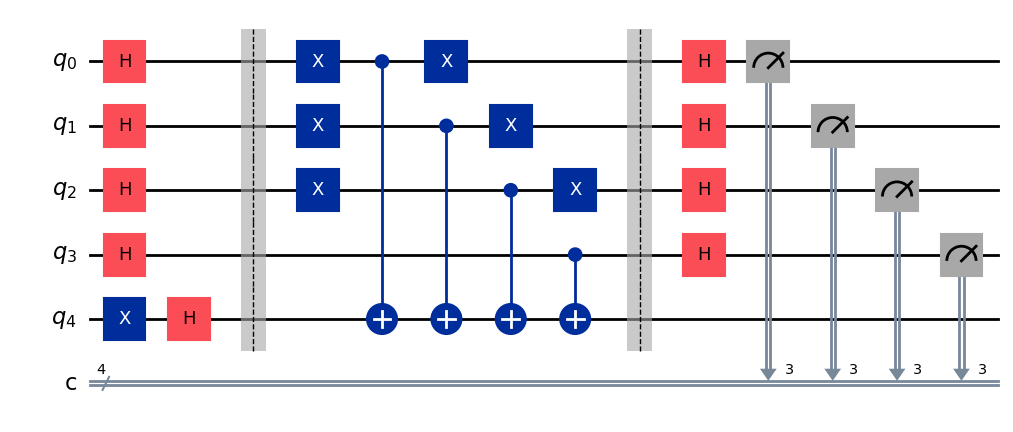

In [28]:
n = 4
dj_balanced_circuit = dj_algorithm("balanced",n)
dj_balanced_circuit.draw(output='mpl')

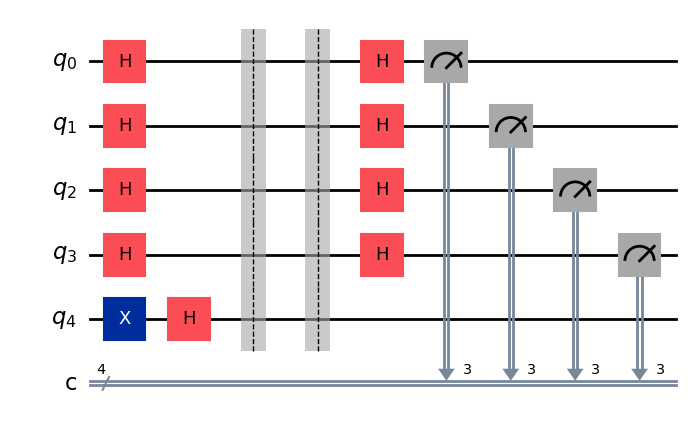

In [29]:
n = 4
dj_constant_circuit = dj_algorithm("constant",n)
dj_constant_circuit.draw(output='mpl')

### 2.5 Executing our circuit
Finally, we execute our circuits using Aer Simulator, and plot the histograms for both circuits.

<div class="alert alert-block alert-success">

**Task 4**: Complete the following code to test each of oracle about Aer Simulation Backend

</div>

Counts(ideal): {'0000': 1024}


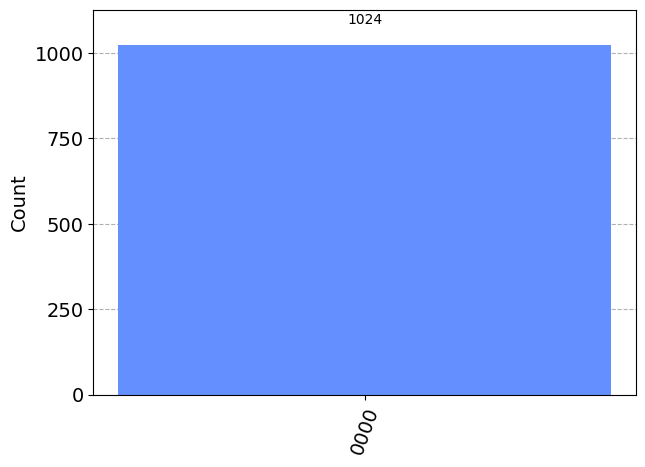

In [30]:
aersim = AerSimulator()

### Write your code below here ###
circuit = dj_algorithm('constant', n)
job = aersim.run(circuit, shots=1024)
counts_ideal = job.result().get_counts()

### Don't change any code past this line ###
print('Counts(ideal):', counts_ideal) 
plot_histogram(counts_ideal)

Counts(ideal): {'1000': 1024}


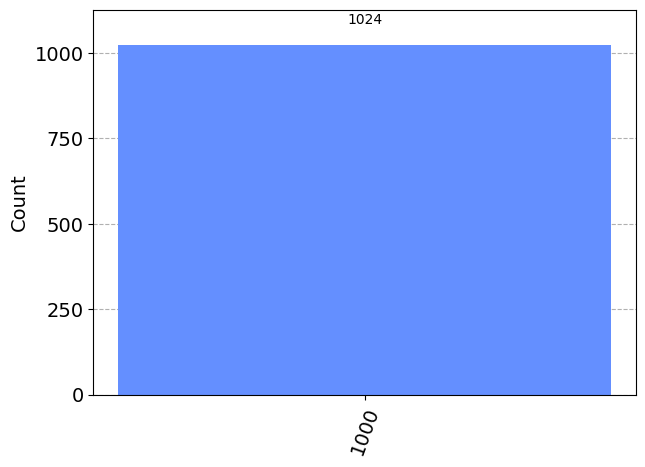

In [31]:
aersim = AerSimulator()

### Write your code below here ###
circuit = dj_algorithm('balanced', n)
job = aersim.run(circuit, shots=1024)
counts_ideal = job.result().get_counts()

### Don't change any code past this line ###
print('Counts(ideal):', counts_ideal) 
plot_histogram(counts_ideal)

**What insight can be drawn from your execution result?**

As we can see from the results above, we are correctly able to predict whether our function is constant or balanced, with 100% certainty.  

🎉 Congratulations on finishing your first quantum algorithm implementation. Thank you for completing this lab, and good luck with the remaining ones! Now, let's move on to the next level: **Grover's algoritm**

## References
- David Deutsch & Richard Jozsa (1992). "Rapid solutions of problems by quantum computation". Proceedings of the Royal Society of London A. 439 (1907): 553–558. Bibcode:1992RSPSA.439..553D. CiteSeerX 10.1.1.655.5997. doi:10.1098/rspa.1992.0167. S2CID 121702767.
- R. Cleve; A. Ekert; C. Macchiavello; M. Mosca (1998). "Quantum algorithms revisited". Proceedings of the Royal Society of London A. 454 (1969): 339–354. arXiv:quant-ph/9708016. Bibcode:1998RSPSA.454..339C. doi:10.1098/rspa.1998.0164. S2CID 16128238.
- [Qiskit Textbook](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/deutsch-jozsa.ipynb)
- [Coding with Qiskit](https://youtube.com/playlist?list=PLOFEBzvs-VvrgHZt3exM_NNiNKtZlHvZi&si=h_vsiB_Tufa1yUim)
- [QBronze Notebook on Deustch-Jozsa](https://gitlab.com/qworld/nickel/-/blob/master/nickel/A04_Deutsch_Jozsa_Algorithm.ipynb?ref_type=heads)


### Additional Information
**Contributed by:** Phalak Bhatnagar, Hoa Nguyen

**Advised by:** Hoa Nguyen

**Version**: 1.0.0